# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Loading The Data

In [60]:
dataset = pd.read_csv(r'C:\Users\sanch\Desktop\TrainIt\bank churn train.csv')
temp_data = dataset

dataset.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               100001 non-null  int64  
 1   CustomerId       100001 non-null  int64  
 2   Surname          100001 non-null  object 
 3   CreditScore      100001 non-null  int64  
 4   Geography        100001 non-null  object 
 5   Gender           100001 non-null  object 
 6   Age              100001 non-null  float64
 7   Tenure           100001 non-null  int64  
 8   Balance          100001 non-null  float64
 9   NumOfProducts    100001 non-null  int64  
 10  HasCrCard        100001 non-null  int64  
 11  IsActiveMember   100001 non-null  int64  
 12  EstimatedSalary  100001 non-null  float64
 13  Exited           100001 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 10.7+ MB


In [7]:
dataset.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,100001.000000,1.000010e+05,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,50000.000000,1.569192e+07,656.484745,38.112173,5.027480,55543.233967,1.554044,0.755362,0.497465,112538.722655,0.211068
std,28867.946472,7.138503e+04,80.277631,8.832951,2.806896,62783.983783,0.547633,0.429874,0.499996,50345.231280,0.408068
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,25000.000000,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,50000.000000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,118022.820000,0.000000
75%,75000.000000,1.575667e+07,710.000000,42.000000,7.000000,119839.690000,2.000000,1.000000,1.000000,155407.210000,0.000000
max,100000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
dataset = dataset.drop(columns = ['CustomerId', 'Surname'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               100001 non-null  int64  
 1   CreditScore      100001 non-null  int64  
 2   Geography        100001 non-null  object 
 3   Gender           100001 non-null  object 
 4   Age              100001 non-null  float64
 5   Tenure           100001 non-null  int64  
 6   Balance          100001 non-null  float64
 7   NumOfProducts    100001 non-null  int64  
 8   HasCrCard        100001 non-null  int64  
 9   IsActiveMember   100001 non-null  int64  
 10  EstimatedSalary  100001 non-null  float64
 11  Exited           100001 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 9.2+ MB


In [9]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,668,33.0,3,0.00,2,1,0,181449.97,0,0,0,1
1,1,627,33.0,1,0.00,2,1,1,49503.50,0,0,0,1
2,2,678,40.0,10,0.00,2,1,0,184866.69,0,0,0,1
3,3,581,34.0,2,148882.54,1,1,1,84560.88,0,0,0,1
4,4,716,33.0,5,0.00,2,1,1,15068.83,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,99996,738,39.0,0,137852.96,1,1,1,4035.46,0,0,0,0
99997,99997,526,38.0,2,0.00,2,1,1,179866.01,0,0,1,1
99998,99998,581,28.0,5,0.00,2,1,0,141763.33,0,0,0,1
99999,99999,681,59.0,2,0.00,2,1,1,186869.58,0,0,0,1


# Visualisation:

<Axes: ylabel='Frequency'>

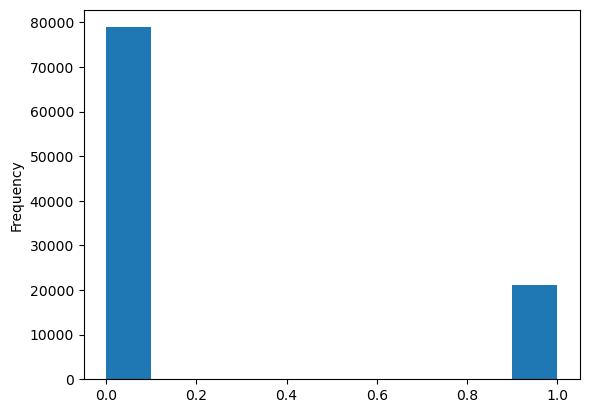

In [11]:
dataset.Exited.plot.hist()

In [12]:
(dataset.Exited==1).sum()

21107

In [13]:
(dataset.Exited==0).sum()

78894

In [14]:
dataset_2 = dataset.drop(columns = 'Exited')

<Axes: title={'center': 'Correlated with Exited Column'}>

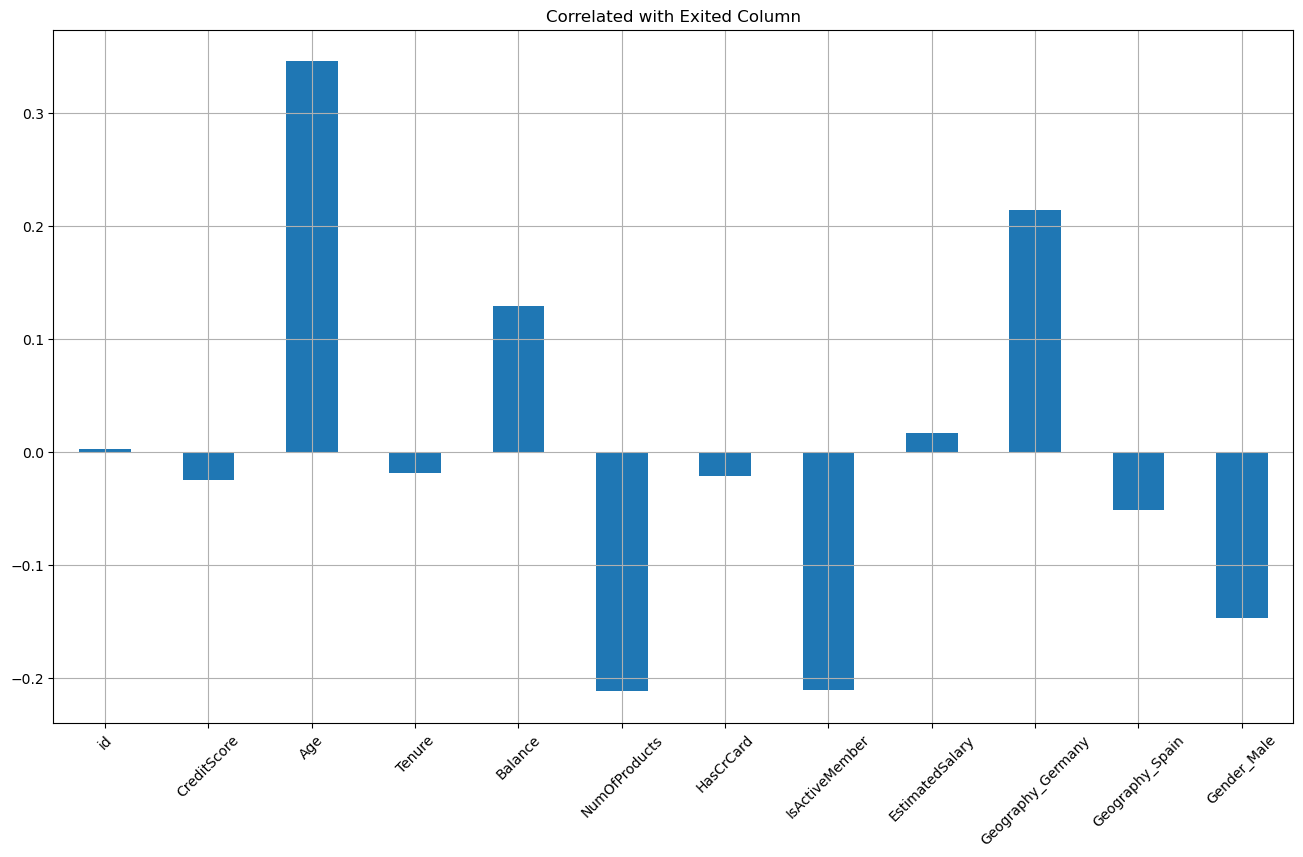

In [15]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16, 9), title='Correlated with Exited Column', rot=45, grid=True)

In [16]:
corr = dataset.corr()

<Axes: >

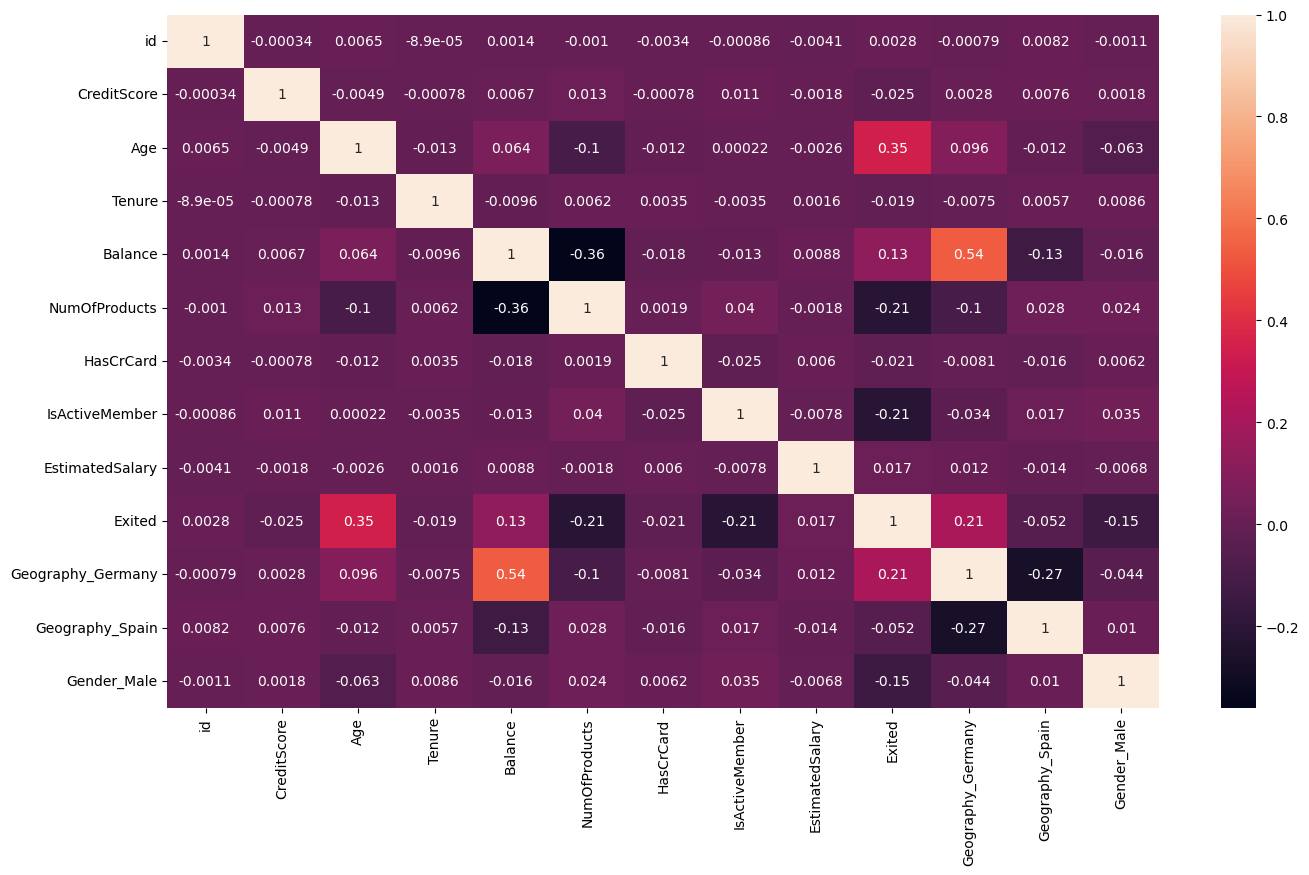

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

In [19]:
X = dataset.drop(columns='Exited')
y = dataset['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape

(80000, 12)

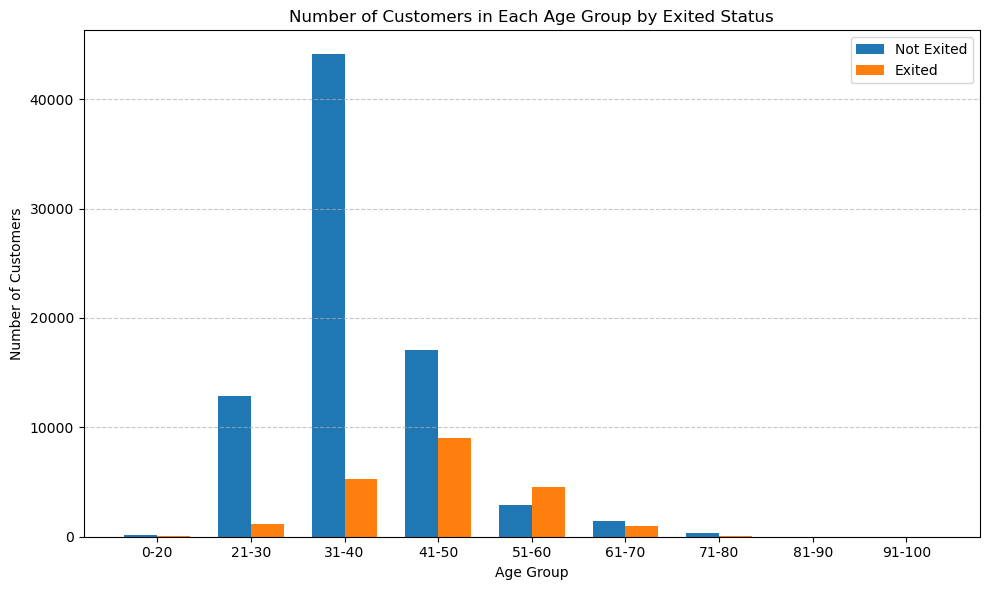

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

age_group_counts_exited_0 = dataset[dataset['Exited'] == 0]['AgeGroup'].value_counts().sort_index()
age_group_counts_exited_1 = dataset[dataset['Exited'] == 1]['AgeGroup'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(labels))

plt.bar(index, age_group_counts_exited_0, bar_width, label='Not Exited')
plt.bar([i + bar_width for i in index], age_group_counts_exited_1, bar_width, label='Exited')

plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Age Group by Exited Status')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


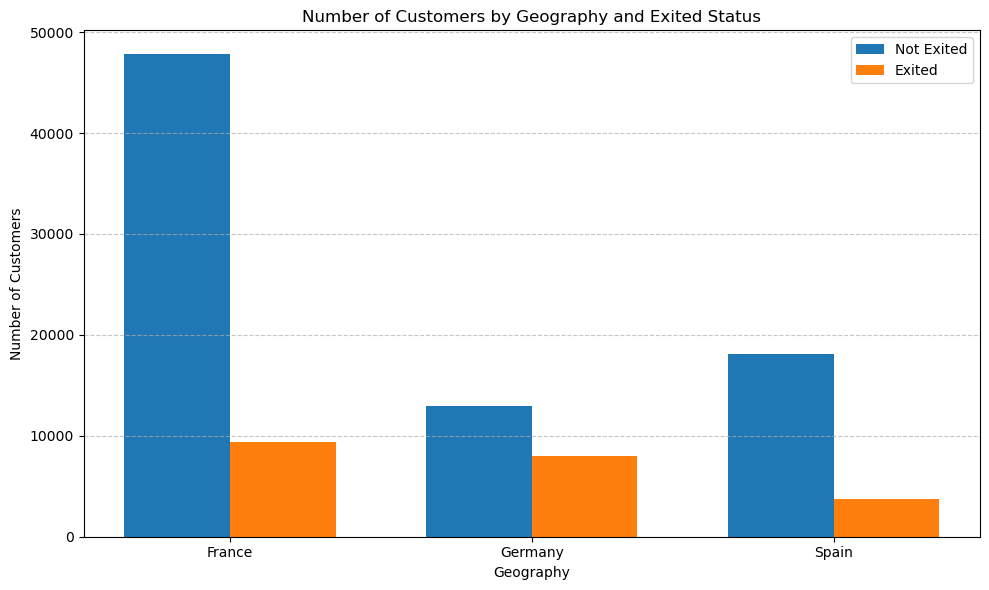

In [61]:
geography_counts_exited_0 = temp_data[temp_data['Exited'] == 0]['Geography'].value_counts().sort_index()
geography_counts_exited_1 = temp_data[temp_data['Exited'] == 1]['Geography'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(geography_counts_exited_0))

plt.bar(index, geography_counts_exited_0, bar_width, label='Not Exited')
plt.bar([i + bar_width for i in index], geography_counts_exited_1, bar_width, label='Exited')

plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Geography and Exited Status')
plt.xticks([i + bar_width / 2 for i in index], geography_counts_exited_0.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

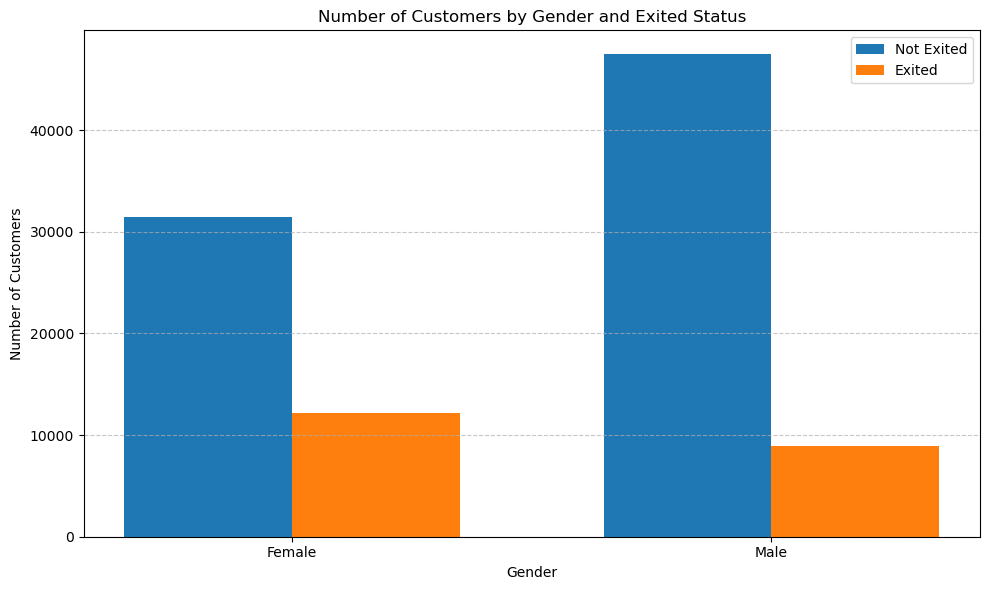

In [62]:
gender_counts_exited_0 = temp_data[temp_data['Exited'] == 0]['Gender'].value_counts().sort_index()
gender_counts_exited_1 = temp_data[temp_data['Exited'] == 1]['Gender'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(gender_counts_exited_0))

plt.bar(index, gender_counts_exited_0, bar_width, label='Not Exited')
plt.bar([i + bar_width for i in index], gender_counts_exited_1, bar_width, label='Exited')

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Gender and Exited Status')
plt.xticks([i + bar_width / 2 for i in index], gender_counts_exited_0.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

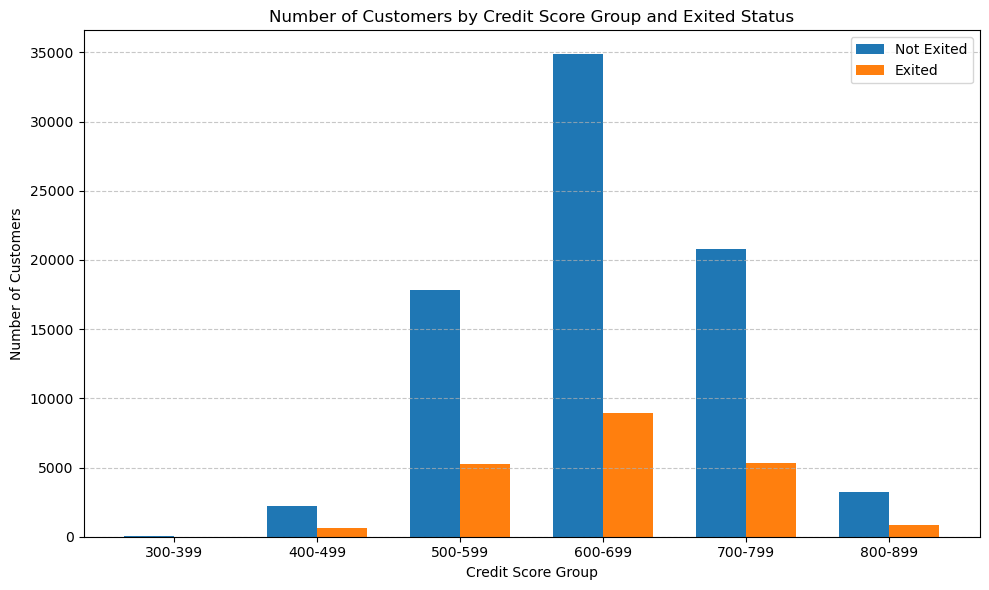

In [63]:
bins = [300, 400, 500, 600, 700, 800, 900]
labels = ['300-399', '400-499', '500-599', '600-699', '700-799', '800-899']

dataset['CreditScoreGroup'] = pd.cut(dataset['CreditScore'], bins=bins, labels=labels, right=False)

credit_score_counts_exited_0 = dataset[dataset['Exited'] == 0]['CreditScoreGroup'].value_counts().sort_index()
credit_score_counts_exited_1 = dataset[dataset['Exited'] == 1]['CreditScoreGroup'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(credit_score_counts_exited_0))

plt.bar(index, credit_score_counts_exited_0, bar_width, label='Not Exited')
plt.bar([i + bar_width for i in index], credit_score_counts_exited_1, bar_width, label='Exited')

plt.xlabel('Credit Score Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Credit Score Group and Exited Status')
plt.xticks([i + bar_width / 2 for i in index], labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Testing on Different Models

In [26]:
def evaluate_models(X, y, models):
    results = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc
        })
    
    return results


In [28]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 1.03395171, -0.63932051, -0.24129582, ..., -0.51491958,
        -0.52839548, -1.13941046],
       [-0.66026166, -0.31528642,  0.43757631, ..., -0.51491958,
        -0.52839548,  0.87764685],
       [ 1.14562726, -0.05356657, -0.69387724, ..., -0.51491958,
        -0.52839548, -1.13941046],
       ...,
       [-0.25597884,  0.29539322, -0.46758653, ..., -0.51491958,
        -0.52839548, -1.13941046],
       [-0.22294365,  0.7689815 ,  0.2112856 , ...,  1.94205085,
        -0.52839548, -1.13941046],
       [ 0.63240451,  1.24256979, -0.46758653, ...,  1.94205085,
        -0.52839548, -1.13941046]])

In [30]:
results = evaluate_models(X, y, models)
results

C:\Users\sanch\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[{'Model': 'Logistic Regression',
  'Accuracy': 0.7847607619619019,
  'Precision': 0.4917431192660551,
  'Recall': 0.12502915791929087,
  'F1 Score': 0.19936767714338852,
  'ROC-AUC': 0.5448869857306776},
 {'Model': 'K-Nearest Neighbors',
  'Accuracy': 0.752362381880906,
  'Precision': 0.27377717391304346,
  'Recall': 0.09400513179379519,
  'F1 Score': 0.13995485327313767,
  'ROC-AUC': 0.5129883110922647},
 {'Model': 'Support Vector Machine',
  'Accuracy': 0.7856607169641517,
  'Precision': 0.0,
  'Recall': 0.0,
  'F1 Score': 0.0,
  'ROC-AUC': 0.5},
 {'Model': 'Decision Tree',
  'Accuracy': 0.7972101394930253,
  'Precision': 0.5269670791501284,
  'Recall': 0.5264753907161185,
  'F1 Score': 0.5267211201866978,
  'ROC-AUC': 0.6987728869069966},
 {'Model': 'Random Forest',
  'Accuracy': 0.8579071046447677,
  'Precision': 0.7364975450081833,
  'Recall': 0.5248425472358292,
  'F1 Score': 0.6129120130754563,
  'ROC-AUC': 0.7368071715433314},
 {'Model': 'Gradient Boosting',
  'Accuracy': 0.86

# Evaluation

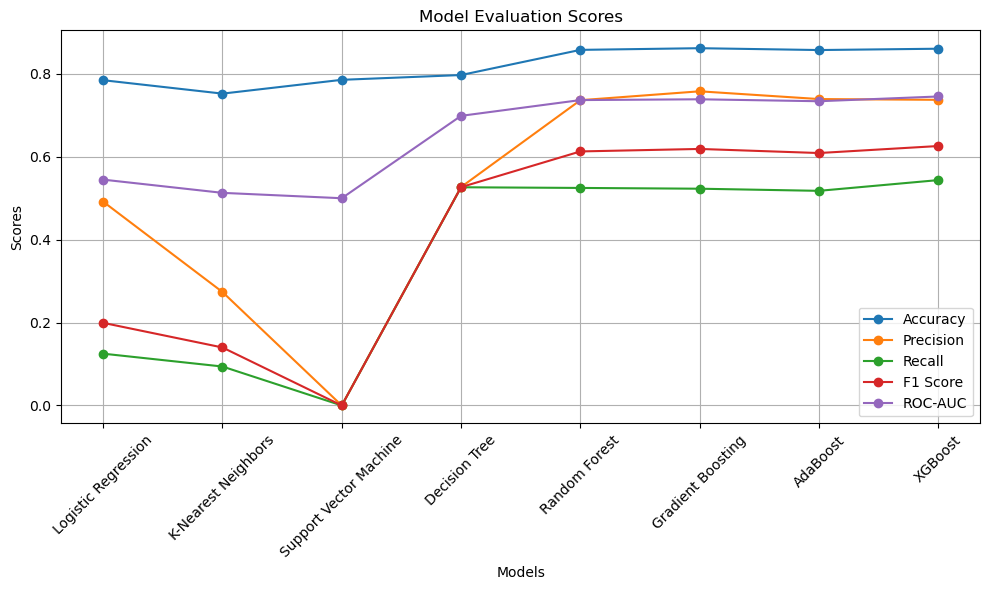

In [46]:
import matplotlib.pyplot as plt

models = [result['Model'] for result in results]
accuracy = [result['Accuracy'] for result in results]
precision = [result['Precision'] for result in results]
recall = [result['Recall'] for result in results]
f1_score = [result['F1 Score'] for result in results]
roc_auc = [result['ROC-AUC'] for result in results]

plt.figure(figsize=(10, 6))

plt.plot(accuracy, marker='o', label='Accuracy')
plt.plot(precision, marker='o', label='Precision')
plt.plot(recall, marker='o', label='Recall')
plt.plot(f1_score, marker='o', label='F1 Score')
plt.plot(roc_auc, marker='o', label='ROC-AUC')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Scores')
plt.xticks(range(len(models)), models, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Hyper Parameter Tuning:
gb_clf = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7],            
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4]       
}

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [53]:
#Best results are for Gradient Classifier, parameters after hyper parameter testing
clf = GradientBoostingClassifier(random_state=0, n_estimators=300, min_samples_leaf=3, max_features=0.3, max_depth=6, learning_rate=0.02).fit(X_train, y_train)
y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
CM

array([[14994,   808],
       [ 1892,  2307]], dtype=int64)

# User Interface for Predicting Customer Churn Possibility

In [40]:
import tkinter as tk
from tkinter import ttk
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def predict_exit():
    customer_id = int(customer_id_entry.get())
    credit_score = float(credit_score_entry.get())
    geography = geography_combobox.get()
    gender = gender_combobox.get()
    age = float(age_entry.get())
    tenure = float(tenure_entry.get())
    balance = float(balance_entry.get())
    num_of_products = float(num_of_products_entry.get())
    has_credit_card = float(has_credit_card_combobox.get())
    is_active_member = float(is_active_member_combobox.get())
    estimated_salary = float(estimated_salary_entry.get())
    
    if geography == 'France':
        Geography_Germany = 0
        Geography_Spain = 0
    elif geography == 'Germany':
        Geography_Germany = 1
        Geography_Spain = 0
    else:
        Geography_Germany = 0
        Geography_Spain = 1
    
    if gender == 'Male':
        Gender_Male = 1
    else:
        Gender_Male = 0
    
    single_test = [[customer_id, credit_score, age, tenure, balance, num_of_products,
                    has_credit_card, is_active_member, estimated_salary, Geography_Germany, Geography_Spain,
                    Gender_Male]]
    
    scaled_test = scaler.fit_transform(single_test)
    result = clf.predict(scaled_test)
    
    if result == 0:
        result_label.config(text=f"Customer with ID {customer_id} is likely to stay with the bank")
    else:
        result_label.config(text=f"Customer with ID {customer_id} is likely to exit.")



In [ ]:
#Interface for single testing:

root = tk.Tk()
root.title("Bank Churn Prediction")

row = 0

customer_id_label = ttk.Label(root, text="Customer ID:")
customer_id_label.grid(row=row, column=0, padx=5, pady=5)
customer_id_entry = ttk.Entry(root)
customer_id_entry.grid(row=row, column=1, padx=5, pady=5)
row += 1

credit_score_label = ttk.Label(root, text="Credit Score:")
credit_score_label.grid(row=row, column=0, padx=5, pady=5)
credit_score_entry = ttk.Entry(root)
credit_score_entry.grid(row=row, column=1, padx=5, pady=5)
row += 1

geography_label = ttk.Label(root, text="Geography:")
geography_label.grid(row=row, column=0, padx=5, pady=5)
geography_combobox = ttk.Combobox(root, values=["France", "Germany", "Spain"])
geography_combobox.grid(row=row, column=1, padx=5, pady=5)
row += 1

gender_label = ttk.Label(root, text="Gender:")
gender_label.grid(row=row, column=0, padx=5, pady=5)
gender_combobox = ttk.Combobox(root, values=["Male", "Female"])
gender_combobox.grid(row=row, column=1, padx=5, pady=5)
row += 1

age_label = ttk.Label(root, text="Age:")
age_label.grid(row=row, column=0, padx=5, pady=5)
age_entry = ttk.Entry(root)
age_entry.grid(row=row, column=1, padx=5, pady=5)
row += 1

tenure_label = ttk.Label(root, text="Tenure:")
tenure_label.grid(row=row, column=0, padx=5, pady=5)
tenure_entry = ttk.Entry(root)
tenure_entry.grid(row=row, column=1, padx=5, pady=5)
row += 1

balance_label = ttk.Label(root, text="Balance:")
balance_label.grid(row=row, column=0, padx=5, pady=5)
balance_entry = ttk.Entry(root)
balance_entry.grid(row=row, column=1, padx=5, pady=5)
row += 1

num_of_products_label = ttk.Label(root, text="Number of Products:")
num_of_products_label.grid(row=row, column=0, padx=5, pady=5)
num_of_products_entry = ttk.Entry(root)
num_of_products_entry.grid(row=row, column=1, padx=5, pady=5)
row += 1

has_credit_card_label = ttk.Label(root, text="Has Credit Card:")
has_credit_card_label.grid(row=row, column=0, padx=5, pady=5)
has_credit_card_combobox = ttk.Combobox(root, values=["0", "1"])
has_credit_card_combobox.grid(row=row, column=1, padx=5, pady=5)
row += 1

is_active_member_label = ttk.Label(root, text="Is Active Member:")
is_active_member_label.grid(row=row, column=0, padx=5, pady=5)
is_active_member_combobox = ttk.Combobox(root, values=["0", "1"])
is_active_member_combobox.grid(row=row, column=1, padx=5, pady=5)
row += 1

estimated_salary_label = ttk.Label(root, text="Estimated Salary:")
estimated_salary_label.grid(row=row, column=0, padx=5, pady=5)
estimated_salary_entry = ttk.Entry(root)
estimated_salary_entry.grid(row=row, column=1, padx=5, pady=5)
row += 1

predict_button = ttk.Button(root, text="Predict", command=predict_exit)
predict_button.grid(row=row, column=0, columnspan=2, pady=10)

result_label = ttk.Label(root, text="")
result_label.grid(row=row+1, column=0, columnspan=2)

root.mainloop()
